In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import scipy

import warnings
warnings.simplefilter("ignore")

In [10]:
data = pd.read_csv('Data.csv', sep = ',')
print(data.shape)
data.head()

(15688, 42)


,StatID,TeamID,PlayerID,SeasonType,Season,Name,Team,Position,Started,GameID,...,Rebounds,Assists,Steals,BlockedShots,Turnovers,PersonalFouls,Points,TrueShootingAttempts,TrueShootingPercentage,PlusMinus
0,120,9,20000557,3,2015,Brandon Bass,BOS,F,1,1,...,1,2,0,0,1,2,10,7.76,62.5,-11
1,134,12,20000571,3,2015,LeBron James,CLE,F,1,1,...,6,7,2,1,5,2,20,19.76,50.0,3
2,149,8,20000586,3,2015,Joe Johnson,BKN,F,1,2,...,6,6,2,0,0,3,17,20.52,41.5,-4
3,165,3,20000602,3,2015,Paul Millsap,ATL,F,1,2,...,7,2,2,1,0,4,6,11.88,25.0,-2
4,196,21,20000633,3,2015,Marc Gasol,MEM,C,1,3,...,11,7,1,3,1,3,15,17.32,42.9,15


# J.J. Redick

In [14]:
data = data[data['Name'] == 'J.J. Redick']
print(data.shape)
data.head()

(490, 42)


,StatID,TeamID,PlayerID,SeasonType,Season,Name,Team,Position,Started,GameID,...,Rebounds,Assists,Steals,BlockedShots,Turnovers,PersonalFouls,Points,TrueShootingAttempts,TrueShootingPercentage,PlusMinus
12,228,28,20000665,3,2015,J.J. Redick,LAC,G,1,4,...,3,2,0,0,2,2,10,13.00,38.5,15
30,37317,28,20000665,3,2015,J.J. Redick,LAC,G,1,12,...,4,2,1,0,1,2,16,14.20,57.1,-5
41,37481,28,20000665,3,2015,J.J. Redick,LAC,G,1,18,...,1,0,1,0,2,1,7,7.88,43.8,-24
56,191481,28,20000665,3,2015,J.J. Redick,LAC,G,1,24,...,3,1,2,0,2,3,17,12.88,65.4,2
76,191718,28,20000665,3,2015,J.J. Redick,LAC,G,1,33,...,2,1,2,0,2,6,13,10.88,59.1,-4


In [48]:
frame1 = data['FieldGoalsPercentage'].values
frame1 = np.array( [el for el in frame1 if el != 100. and el != 0.] )

frame2 = data['FieldGoalsAttempted'].values

names = ('FieldGoalsPercentage', 'FieldGoalsAttempted')

In [27]:
print(f"frame1 len: {len(frame1)} \nframe2 len: {len(frame2)}")

frame1 len: 453 
frame2 len: 490


## Stage 1

Построить вариационный ряд.

Вычислить выборочное среднее, выборочную дисперсию, исправленную дисперсию,
коэффициенты асимметриии и эксцесса, размах выборки, медиану, квартили и выборочную квантиль уровня 1/3.

Построить на одном рисунке гистограмму, полигон частот и график плотности (вероятностей) 
соответствующего закона распределения.

Построить на одном рисунке графики эмпирической функции
распределения и функции распределения соответствующего закона распределения.

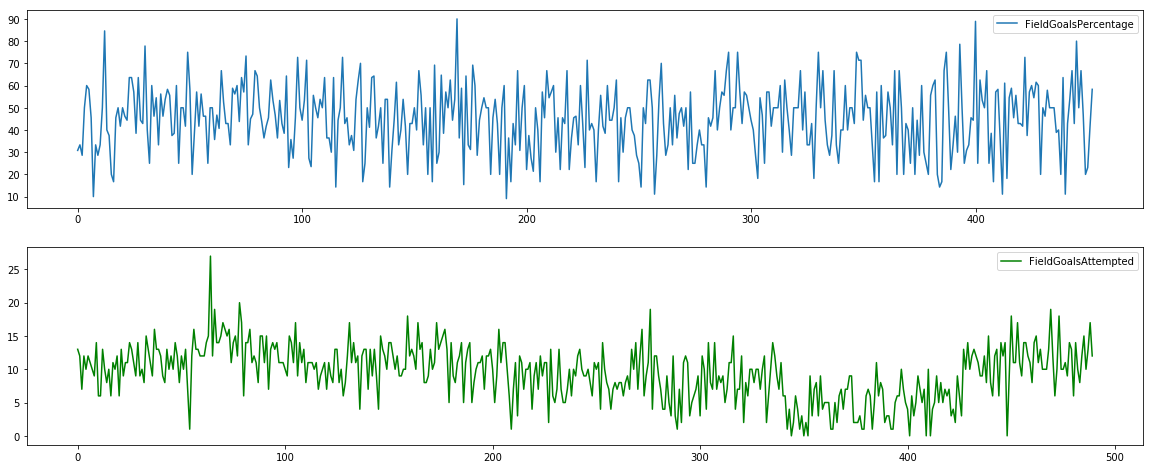

In [111]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 8))


ax1.plot(frame1, label = 'FieldGoalsPercentage')
ax1.legend()

ax2.plot(frame2, c = 'g', label = 'FieldGoalsAttempted')
ax2.legend()

plt.plot();

<img src='imgs/1.png' >

In [112]:
def _description(frame, name, distr = 'norm'):
    mean = frame.mean()
    std = frame.std()
    std_corrected = frame.std(ddof = 1) # Исправленную дисперсию
    skew = scipy.stats.skew(frame) # Коэффициент асимметрии
    kurtosis = scipy.stats.kurtosis(frame) # эксцесс
    samples_span = frame.max() - frame.min()
    median = np.median(frame)
    percentile = np.percentile(frame, [25, 50, 75]) # квартили
    quantile = np.quantile(frame, 0.333)
    
    print(name, '\n')
    print("выборочное среднее: ", mean,
          "\nвыборочная дисперсия: ,", std,
          "\nисправленная дисперсия: ", std_corrected,
          "\nкоэффициенты асимметриии: ", skew,
          "\nэксцесс: ", kurtosis,
          "\nразмах выборки: ", samples_span,
          "\nмедиана: ", median,
          "\nквартили 25,50,75: ", percentile,
          "\nвыборочный квантиль уровня 1/3: ", quantile)
    sbn.distplot(frame, hist=True, rug=True, color="r", bins = 20, label = 'True distribution');    
    
    if distr == 'norm':
        distrib_data = np.random.normal(mean, std, 10000) 
    else:
        distrib_data = scipy.stats.poisson.rvs(mu=mean, size=10000)
        
    sbn.distplot(distrib_data, hist=False, color="b", label = 'Empirical distribution');
    return
    
    

FieldGoalsPercentage 

выборочное среднее:  45.03421633554084 
выборочная дисперсия: , 15.341687400307041 
исправленная дисперсия:  15.358648917262055 
коэффициенты асимметриии:  -0.0659494175258216 
эксцесс:  -0.3304502074527522 
размах выборки:  80.9 
медиана:  45.5 
квартили 25,50,75:  [33.3 45.5 55.6] 
выборочный квантиль уровня 1/3:  40.0


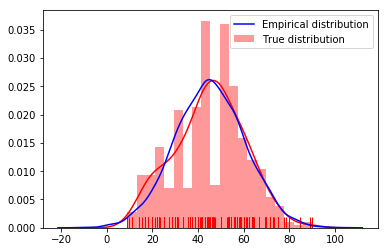

In [113]:
_description(frame1, name=names[0])

FieldGoalsAttempted 

выборочное среднее:  9.473469387755102 
выборочная дисперсия: , 4.097324936689546 
исправленная дисперсия:  4.1015122908091 
коэффициенты асимметриии:  -0.10474653371270994 
эксцесс:  0.1544473313734933 
размах выборки:  27 
медиана:  10.0 
квартили 25,50,75:  [ 7. 10. 12.] 
выборочный квантиль уровня 1/3:  8.0


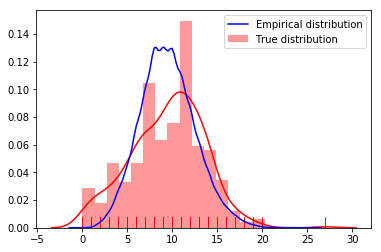

In [114]:
_description(frame2, name=names[1], distr = 'Poisson')

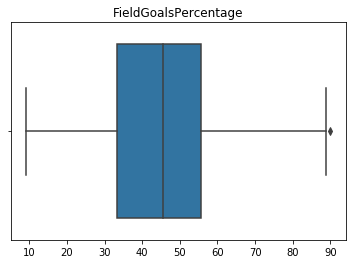

In [143]:
sbn.boxplot(frame1)
plt.title(names[0])
plt.plot();

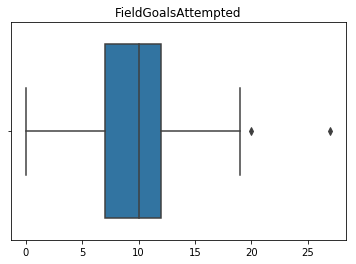

In [142]:
sbn.boxplot(frame2)
plt.title(names[1])
plt.plot();